In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Setting a theme for seaborn plots
sns.set_theme()

# Loading the dataset
dataset_path = 'Downloads/Monkeypox Coursework Dataset (1) (1).csv' 
df = pd.read_csv(dataset_path)

# Columns to drop 
columns_to_drop = ['Test ID', 'Home ownership', 'Month of Birth', 'Health Insurance']

# Dropping the columns
df = df.drop(columns=columns_to_drop)

# Displaying the first few rows of the dataset to verify successful loading
print(df.head())

      Systemic Illness  Encoded Systemic Illness  Rectal Pain  Sore Throat  \
0                  NaN                       0.0          0.0            1   
1                Fever                       1.0          1.0            0   
2                Fever                       1.0          0.0            1   
3                  NaN                       0.0          1.0            0   
4  Swollen Lymph Nodes                       3.0          1.0            1   

   Penile Oedema Oral Lesions  Solitary Lesion  Swollen Tonsils  \
0            1.0            1                0              1.0   
1            1.0            1                0              0.0   
2            1.0            0                0              0.0   
3            0.0            0                1              1.0   
4            1.0            0                0              1.0   

   HIV Infection  Red blood cells count  White blood cells count Age  \
0            0.0                5363690                 

In [2]:
# Displaying basic statistics of the dataset
print("\nBasic statistical summary:\n", df.describe(), "\n")


Basic statistical summary:
        Encoded Systemic Illness   Rectal Pain   Sore Throat  Penile Oedema  \
count              24998.000000  24997.000000  25000.000000   24994.000000   
mean                   1.497640      0.493819      0.502160       0.504441   
std                    1.116872      0.499972      0.500005       0.499990   
min                    0.000000      0.000000      0.000000       0.000000   
25%                    1.000000      0.000000      0.000000       0.000000   
50%                    1.000000      0.000000      1.000000       1.000000   
75%                    3.000000      1.000000      1.000000       1.000000   
max                    3.000000      1.000000      1.000000       1.000000   

       Solitary Lesion  Swollen Tonsils  HIV Infection  Red blood cells count  \
count     25000.000000     24993.000000   24995.000000           2.500000e+04   
mean          0.501080         0.501260       0.503301           5.004591e+06   
std           0.500009   

In [3]:
# Initial Data Exploration

# Checking for missing values
print("Missing values in each column:\n\n", df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False), "\n")

# Checking data types of each column
print("\nData types of each column:\n\n", df.dtypes, "\n")


# Adjust the column names based on your dataset
categorical_columns = ['Systemic Illness', 'Sexually Transmitted Infection', 'MPOX PCR Result']
for column in categorical_columns:
    print(f"Unique values in {column}: {df[column].unique()} \n")

def detect_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"Number of outliers in {column_name}: {outliers.shape[0]} \n")
    if outliers.shape[0] > 0:
        print(f"Outliers range for {column_name}: Below {lower_bound} or above {upper_bound} \n")

# Check for outliers in 'Red blood cells count' and 'White blood cells count'
detect_outliers(df, 'Red blood cells count')
detect_outliers(df, 'White blood cells count')


# Convert 'Age' to a numeric type, coercing any errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
# After conversion, you may have NaN values where non-numeric strings were present.
# Decide how to handle these NaNs: you can fill them with a value, like the median or mean, or drop them.
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)

# Now, try recalculating the quantiles or performing other operations
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_age = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f"Number of outliers in Age: {outliers_age.shape[0]} \n")


duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates} \n")


Missing values in each column:

 Systemic Illness                  6216
Age                                 36
Swollen Tonsils                      7
Penile Oedema                        6
HIV Infection                        5
Oral Lesions                         4
Sexually Transmitted Infection       4
Rectal Pain                          3
Encoded Systemic Illness             2
dtype: int64 


Data types of each column:

 Systemic Illness                   object
Encoded Systemic Illness          float64
Rectal Pain                       float64
Sore Throat                         int64
Penile Oedema                     float64
Oral Lesions                       object
Solitary Lesion                     int64
Swollen Tonsils                   float64
HIV Infection                     float64
Red blood cells count               int64
White blood cells count             int64
Age                                object
Sexually Transmitted Infection    float64
MPOX PCR Result          

In [ ]:
# Normalize labels to lowercase
df['Systemic Illness'] = df['Systemic Illness'].str.lower()

# Impute missing values with the mode, avoiding inplace to prevent warning
systemic_illness_mode = df['Systemic Illness'].mode()[0]
df['Systemic Illness'] = df['Systemic Illness'].fillna(systemic_illness_mode)


In [4]:
# Normalize labels to lowercase
df['Systemic Illness'] = df['Systemic Illness'].str.lower()

# Impute missing values with the mode - Adjusted to avoid warnings
systemic_illness_mode = df['Systemic Illness'].mode()[0]
df['Systemic Illness'] = df['Systemic Illness'].fillna(systemic_illness_mode)

# For binary variables, adjusted to directly assign the filled Series
binary_variables = ['Swollen Tonsils', 'Penile Oedema', 'HIV Infection', 'Rectal Pain', 'Oral Lesions', 'Sexually Transmitted Infection']
for column in binary_variables:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

# Map 'YES' to 1 and any other value to 0
df['Oral Lesions'] = df['Oral Lesions'].map({'YES': 1, 'NO': 0}).astype('Int64')

# Now, the rest of the data type conversions should work without issues
df = df.astype({
    'Rectal Pain': 'Int64', 
    'Penile Oedema': 'Int64', 
    'Swollen Tonsils': 'Int64', 
    'HIV Infection': 'Int64', 
    'Sexually Transmitted Infection': 'Int64'
})


In [5]:
# Convert float types to integer where applicable
df['Rectal Pain'] = df['Rectal Pain'].astype(int)
df['Penile Oedema'] = df['Penile Oedema'].astype(int)
df['Swollen Tonsils'] = df['Swollen Tonsils'].astype(int)
df['HIV Infection'] = df['HIV Infection'].astype(int)
df['Sexually Transmitted Infection'] = df['Sexually Transmitted Infection'].astype(int)

# Replace NaN with 0 (or another placeholder value) before converting to int
df['Oral Lesions'] = df['Oral Lesions'].fillna(0).astype(int)

In [6]:
# Re-calculating the IQR for 'Age'
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Directly removing outliers from the DataFrame
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

from scipy.stats.mstats import winsorize

# Applying winsorization to the 'Age' column
# This operation limits values to the 1st and 99th percentiles
df['Age'] = winsorize(df['Age'], limits=[0.01, 0.01])


In [7]:
# Initial Data Exploration

# Checking for missing values
print("Missing values in each column:\n\n", df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False), "\n")

# Checking data types of each column
print("\nData types of each column:\n\n", df.dtypes, "\n")


# Adjust the column names based on your dataset
categorical_columns = ['Systemic Illness', 'Sexually Transmitted Infection', 'MPOX PCR Result']
for column in categorical_columns:
    print(f"Unique values in {column}: {df[column].unique()} \n")

def detect_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"Number of outliers in {column_name}: {outliers.shape[0]} \n")
    if outliers.shape[0] > 0:
        print(f"Outliers range for {column_name}: Below {lower_bound} or above {upper_bound} \n")

# Check for outliers in 'Red blood cells count' and 'White blood cells count'
detect_outliers(df, 'Red blood cells count')
detect_outliers(df, 'White blood cells count')


# Check for outliers in 'Age'
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_age = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f"Number of outliers in Age: {outliers_age.shape[0]} \n")


duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates} \n")

Missing values in each column:

 Encoded Systemic Illness    2
dtype: int64 


Data types of each column:

 Systemic Illness                   object
Encoded Systemic Illness          float64
Rectal Pain                         int32
Sore Throat                         int64
Penile Oedema                       int32
Oral Lesions                        int32
Solitary Lesion                     int64
Swollen Tonsils                     int32
HIV Infection                       int32
Red blood cells count               int64
White blood cells count             int64
Age                               float64
Sexually Transmitted Infection      int32
MPOX PCR Result                    object
dtype: object 

Unique values in Systemic Illness: ['fever' 'swollen lymph nodes' 'muscle aches and pain'] 

Unique values in Sexually Transmitted Infection: [0 1] 

Unique values in MPOX PCR Result: ['Negative' 'Positive'] 

Number of outliers in Red blood cells count: 0 

Number of outliers in White b

C:\Users\CYBORG\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\CYBORG\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(



Distribution of the Class Variable:


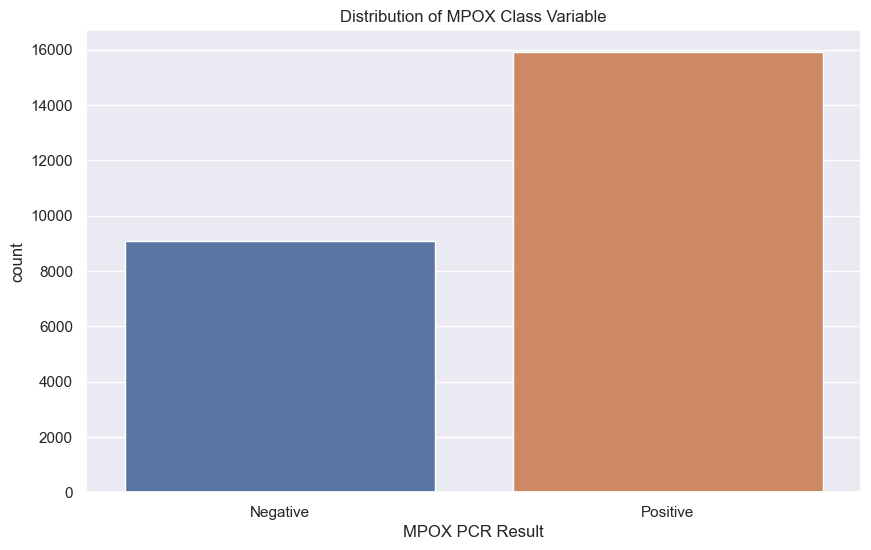

In [8]:
print("\nDistribution of the Class Variable:")
plt.figure(figsize=(10, 6))
sns.countplot(x='MPOX PCR Result', data=df)
plt.title('Distribution of MPOX Class Variable')
plt.show()


In [9]:
# Selecting categorical features and the target variable
X = df[['Systemic Illness', 'Encoded Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection']]
y = df['MPOX PCR Result']


# Printing the list of feature names used for building the classification models
print("Feature names used for building the classification models:")
print(X.columns.tolist())

# Printing the data shape of input features and output features
print("\nData shape of input features (X):", X.shape)
print("Data shape of output feature (y):", y.shape)

# Performing train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Printing the shapes of the training and testing sets
print("\nTraining features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

# Optional: Verifying stratification
print("\nClass distribution in Training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in Testing set:")
print(y_test.value_counts(normalize=True))

Feature names used for building the classification models:
['Systemic Illness', 'Encoded Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection']

Data shape of input features (X): (24996, 10)
Data shape of output feature (y): (24996,)

Training features shape: (17497, 10)
Testing features shape: (7499, 10)
Training labels shape: (17497,)
Testing labels shape: (7499,)

Class distribution in Training set:
MPOX PCR Result
Positive    0.636395
Negative    0.363605
Name: proportion, dtype: float64

Class distribution in Testing set:
MPOX PCR Result
Positive    0.636352
Negative    0.363648
Name: proportion, dtype: float64


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Logistic Regression Accuracy: 0.64


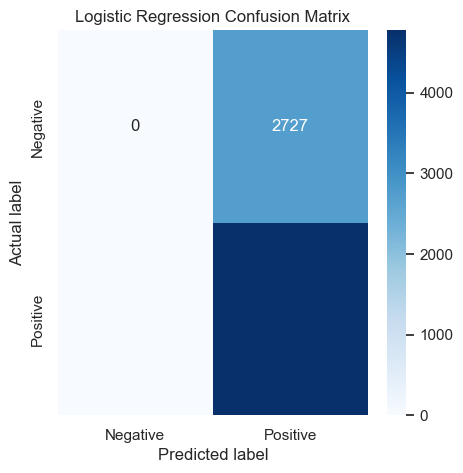

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'MPOX PCR Result' is your target variable

# Selecting features and target
X = df.drop(['MPOX PCR Result'], axis=1)
y = df['MPOX PCR Result']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Defining the columns that you want to apply one-hot encoding to
categorical_features = ['Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection', 'Encoded Systemic Illness']

# Creating a column transformer with one-hot encoder for the categorical variables
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)], remainder='passthrough')

# Now, apply this transformation as part of a training pipeline for each model
# Example with Logistic Regression
lr_model = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)

lr_pred_proba = lr_model.predict_proba(X_test)

# Evaluating the model using accuracy score and confusion matrix
from sklearn.metrics import accuracy_score
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_pred):.2f}")

# Generate the confusion matrix
lr_cm = confusion_matrix(y_test, lr_pred)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Decision Tree Accuracy: 0.59


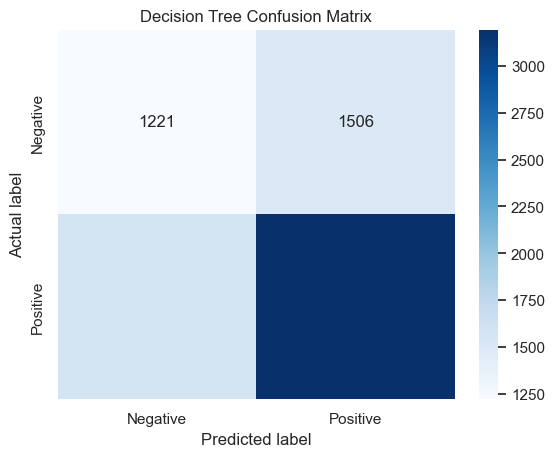

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Assuming 'df' is your DataFrame and it's already loaded

# Define your features and target variable
X = df.drop('MPOX PCR Result', axis=1)  # or whichever columns are your features
y = df['MPOX PCR Result']  # target variable

# Define categorical features that need encoding
categorical_features = ['Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection', 'Encoded Systemic Illness']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Creating a column transformer with one-hot encoder
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)], remainder='passthrough')

# Creating a pipeline with preprocessor and the Decision Tree Classifier
dt_pipeline = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=42))

# Training the Decision Tree model
dt_pipeline.fit(X_train, y_train)

# Making predictions on the test set
dt_pred = dt_pipeline.predict(X_test)
dt_pred_proba = dt_pipeline.predict_proba(X_test)

# At this point, you can evaluate the model using your preferred metrics
# For example, to print the accuracy of the model, you could use:
from sklearn.metrics import accuracy_score
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.2f}")

# And to generate a confusion matrix:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Decision Tree Confusion Matrix')
plt.show()

SVM with RBF Kernel Accuracy: 0.64


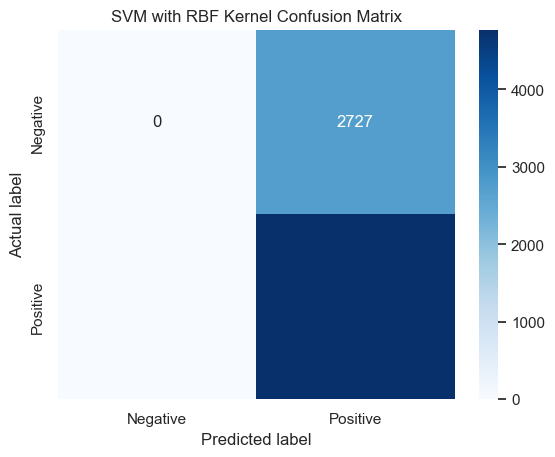

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import pandas as pd

# Assuming 'df' is your DataFrame and it's already loaded

# Define your features and target variable
X = df.drop('MPOX PCR Result', axis=1)  # Exclude the target variable from features
y = df['MPOX PCR Result']  # Target variable

# Define categorical features that need encoding
categorical_features = ['Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection', 'Encoded Systemic Illness']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Creating a column transformer with one-hot encoder for the categorical variables
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)], remainder='passthrough')

# Creating a pipeline with preprocessor and the SVM Classifier with RBF kernel
svm_pipeline = make_pipeline(
    preprocessor, 
    SVC(kernel='rbf', probability=True, random_state=42)  # Note the 'probability=True'
)

# Training the SVM model
svm_pipeline.fit(X_train, y_train)
# Making predictions on the test set
svm_pred = svm_pipeline.predict(X_test)

svm_pred_proba = svm_pipeline.predict_proba(X_test)

# Evaluating the model using accuracy score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print accuracy
print(f"SVM with RBF Kernel Accuracy: {accuracy_score(y_test, svm_pred):.2f}")

# Plotting the confusion matrix
cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('SVM with RBF Kernel Confusion Matrix')
plt.show()

Naïve Bayes Accuracy: 0.64


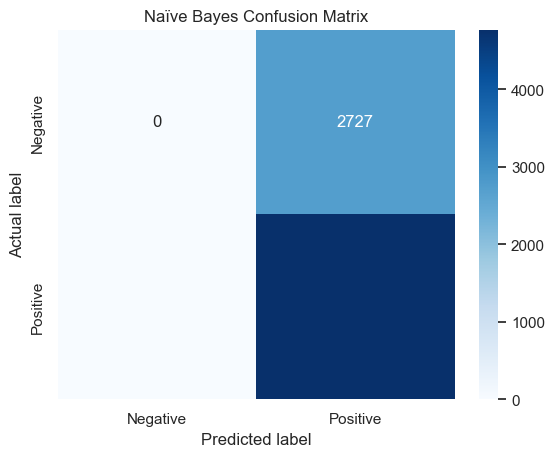

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it's already loaded

# Define your features and target variable
X = df.drop('MPOX PCR Result', axis=1)  # Exclude the target variable from features
y = df['MPOX PCR Result']  # Target variable

# Define categorical features that need encoding
categorical_features = ['Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection', 'Encoded Systemic Illness']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Creating a column transformer with one-hot encoder for the categorical variables
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)], remainder='passthrough')

# Creating a pipeline with preprocessor and the Naïve Bayes Classifier
nb_pipeline = make_pipeline(preprocessor, GaussianNB())

# Training the Naïve Bayes model
nb_pipeline.fit(X_train, y_train)

# Making predictions on the test set
nb_pred = nb_pipeline.predict(X_test)
nb_pred_proba = nb_pipeline.predict_proba(X_test)

# Evaluating the model using accuracy score and confusion matrix
print(f"Naïve Bayes Accuracy: {accuracy_score(y_test, nb_pred):.2f}")

# Plotting the confusion matrix
cm = confusion_matrix(y_test, nb_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Naïve Bayes Confusion Matrix')
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score


model_scores = {
    'Model': ['LR', 'DT', 'SVM', 'NB'],
    'Accuracy': [accuracy_score(y_test, lr_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, svm_pred), accuracy_score(y_test, nb_pred)],
    'Recall': [recall_score(y_test, lr_pred, pos_label='Positive'), recall_score(y_test, dt_pred, pos_label='Positive'), recall_score(y_test, svm_pred, pos_label='Positive'), recall_score(y_test, nb_pred, pos_label='Positive')],
    'Precision': [precision_score(y_test, lr_pred, pos_label='Positive'), precision_score(y_test, dt_pred, pos_label='Positive'), precision_score(y_test, svm_pred, pos_label='Positive'), precision_score(y_test, nb_pred, pos_label='Positive')],
    'F1-Score': [f1_score(y_test, lr_pred, pos_label='Positive'), f1_score(y_test, dt_pred, pos_label='Positive'), f1_score(y_test, svm_pred, pos_label='Positive'), f1_score(y_test, nb_pred, pos_label='Positive')],
}


# Ensure each list has the same length, corresponding to the number of models
import pandas as pd
model_scores_df = pd.DataFrame(model_scores)



auc_roc_scores = [
    roc_auc_score(y_test, lr_pred_proba[:, 1]),  # Direct use of 1D array
    roc_auc_score(y_test, dt_pred_proba[:, 1]),  # Assuming dt_pred_proba is similar
    roc_auc_score(y_test, svm_pred_proba[:, 1]),  # Assuming svm_pred_proba is similar
    roc_auc_score(y_test, nb_pred_proba[:, 1])    # Assuming nb_pred_proba is similar
]

# Updating the 'AUC-ROC' key in model_scores with the new scores
model_scores['AUC-ROC'] = auc_roc_scores

# Recreating the DataFrame with updated scores
model_scores_df = pd.DataFrame(model_scores)
print(model_scores_df)

  Model  Accuracy    Recall  Precision  F1-Score   AUC-ROC
0    LR  0.636352  1.000000   0.636352  0.777769  0.496436
1    DT  0.588745  0.669321   0.679574  0.674409  0.558533
2   SVM  0.636352  1.000000   0.636352  0.777769  0.509990
3    NB  0.636352  1.000000   0.636352  0.777769  0.506966


Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\CYBORG\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\CYBORG\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CYBORG\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\CYBORG\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CYBORG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fsc




Best hyperparameters: {'classifier__C': 0.001, 'classifier__penalty': 'l1'} 

Accuracy: 0.636351513535138, Recall: 1.0, Precision: 0.636351513535138, F1-Score: 0.7777687230054601, AUC-ROC: 0.4970520801730914

Confusion Matrix:
 [[   0 2727]
 [   0 4772]] 



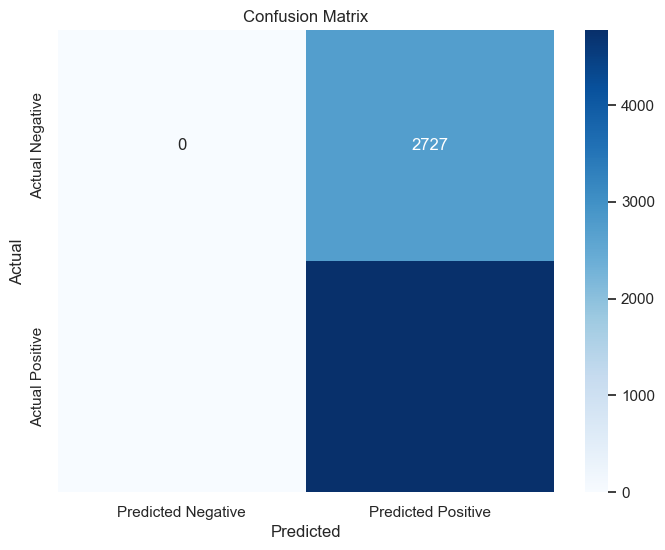

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd


# Example dataset loading and preparation
# df = pd.read_csv('your_dataset.csv')
# X = df.drop('MPOX PCR Result', axis=1)  # Replace 'TargetVariableName' with the name of your target variable
# y = df['MPOX PCR Result']

# Splitting dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Preprocessing pipeline for categorical data
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough')

# Model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='liblinear'))  # Using liblinear for l1 penalty support
])
# Hyperparameter grid
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l1', 'l2'],  # Norm used in the penalization
}

# GridSearchCV setup
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='recall', cv=5, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("\n\n\nBest hyperparameters:", grid_search.best_params_, "\n")

# Predictions using the best found model
y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='Positive')
precision = precision_score(y_test, y_pred, pos_label='Positive')
f1 = f1_score(y_test, y_pred, pos_label='Positive')
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Display metrics and confusion matrix
print(f"Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}, F1-Score: {f1}, AUC-ROC: {auc_roc}\n")
print("Confusion Matrix:\n", conf_matrix,"\n")

# Use seaborn to create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.636351513535138 
Recall: 1.0 
Precision: 0.636351513535138 
F1-Score: 0.7777687230054601 
AUC-ROC: 0.4964282541693677
Confusion Matrix:
 [[   0 2727]
 [   0 4772]]


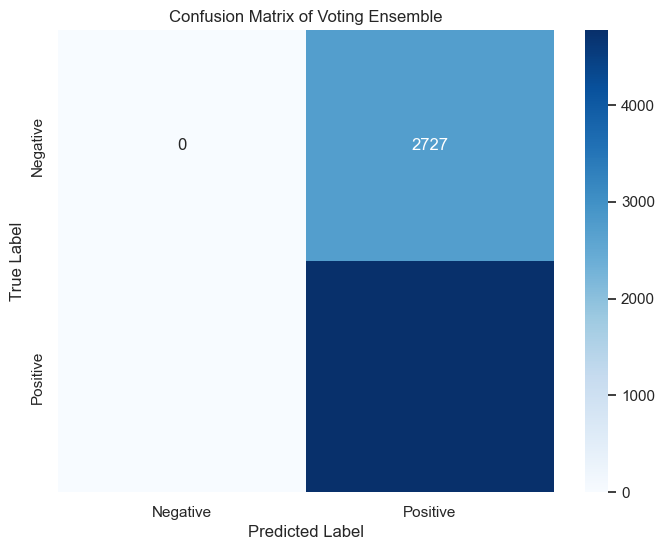

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

# OneHotEncoder inside a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ], remainder='passthrough')

# Logistic Regression and SVC models
lr_best = LogisticRegression(C=0.001, penalty='l2', solver='liblinear', max_iter=1000)  # Adjusted based on previous error discussion
svm_best = SVC(probability=True)

# Voting Classifier with 'soft' voting
voting_clf = VotingClassifier(estimators=[
    ('lr', lr_best),
    ('svm', svm_best)],
    voting='soft')
# Pipeline for preprocessing and then fitting the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', voting_clf)
])

# Assuming X_train and y_train are defined, fit the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_ensemble = model_pipeline.predict(X_test)
y_pred_proba_ensemble = model_pipeline.predict_proba(X_test)[:, 1]  # For AUC-ROC calculation

# Evaluate the model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble, pos_label='Positive')  # Adjust pos_label as necessary
precision_ensemble = precision_score(y_test, y_pred_ensemble, pos_label='Positive')
f1_ensemble = f1_score(y_test, y_pred_ensemble, pos_label='Positive')
auc_roc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)

conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Display evaluation results
print(f"Accuracy: {accuracy_ensemble} \nRecall: {recall_ensemble} \nPrecision: {precision_ensemble} \nF1-Score: {f1_ensemble} \nAUC-ROC: {auc_roc_ensemble}")
print("Confusion Matrix:\n", conf_matrix_ensemble)


labels = ['Negative', 'Positive']  # Adjust these labels as necessary for your dataset

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix of Voting Ensemble')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()